In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_df = pd.read_csv('mhealth_raw_data.csv')

In [3]:
# Extracting datat from log files of subjects
# combined_df = pd.DataFrame()

### WE ARE NOT USING ELECTROCARDIOGRAM ###

## rw =  right-lower-arm ##
## la = left-ankle ##
## ch = chest ##

# Loop through and add all 10 subjects' sensor data to dataframe
# for i in range(1, 11):
#     df = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
#     # Note: Excluding the ECG data collected with the chest sensor
#     df = df.loc[:, [5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 23]].rename(columns= {
# #         0: 'acc_ch_x', 
# #         1: 'acc_ch_y', 
# #         2: 'acc_ch_z', 
#         5: 'acc_la_x', 
#         6: 'acc_la_y',
#         7: 'acc_la_z', 
#         8: 'gyr_la_x',
#         9: 'gyr_la_y', 
#         10: 'gyr_la_z', 
# #         11: 'mag_la_x', 
# #         12: 'mag_la_y', 
# #         13: 'mag_la_z', 
#         14: 'acc_rw_x', 
#         15: 'acc_rw_y',
#         16: 'acc_rw_z', 
#         17: 'gyr_rw_x', 
#         18: 'gyr_rw_y', 
#         19: 'gyr_rw_z', 
# #         20: 'mag_rw_x', 
# #         21: 'mag_rw_y', 
# #         22: 'mag_rw_z',
#         23: 'activity'
#     })
#     df['subject'] = f'subject{i}'
#     combined_df = pd.concat([combined_df, df])

In [4]:
combined_df.head()

alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1

### EDA 

In [5]:
# Note: No non-null data according to dataframe information. Dataset is in a good state
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [6]:
# Note: It appears that the amount of observations produced by each subject in the experiment are relatively
# comparable. Resampling may be unnecessary here
combined_df.subject.value_counts()

subject1     161280
subject9     135168
subject2     130561
subject8     129024
subject3     122112
subject5     119808
subject4     116736
subject7     104448
subject6      98304
subject10     98304
Name: subject, dtype: int64

In [7]:
# Note: It appears that the data is unbalanced in regards to the 0 (null) category. Therefore, we will resample
# this category to have a more balanced dataset.
combined_df['Activity'].value_counts()

0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: Activity, dtype: int64

<AxesSubplot: >

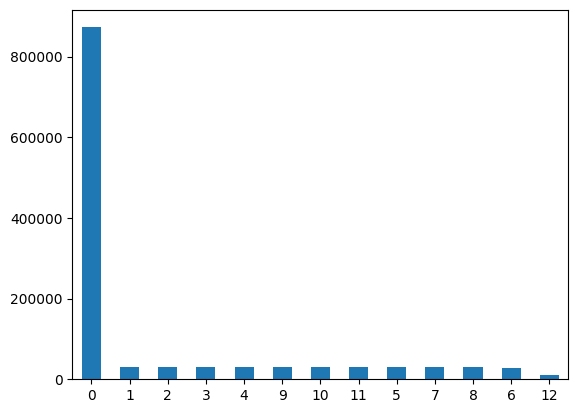

In [8]:
# Visualization of imbalance:
combined_df['Activity'].value_counts().plot.bar(rot=0)

<AxesSubplot: >

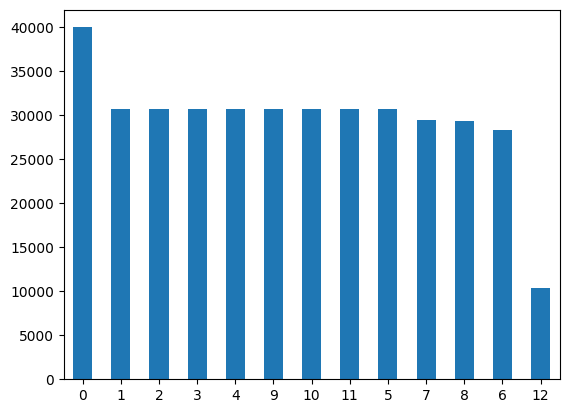

In [9]:
# Resampling activity 0 to 30720 observations
from sklearn.utils import resample
 
df_majority = combined_df[combined_df.Activity==0]
df_minorities = combined_df[combined_df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=40000, random_state=42)
data = pd.concat([df_majority_downsampled, df_minorities])
data.Activity.value_counts()

data['Activity'].value_counts().plot.bar(rot=0)

In [10]:
def plot_category(data,cat):
  array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
  plt.barh(array.index, width = array.values)
  for index, value in enumerate(array.values):
      plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
  plt.show()

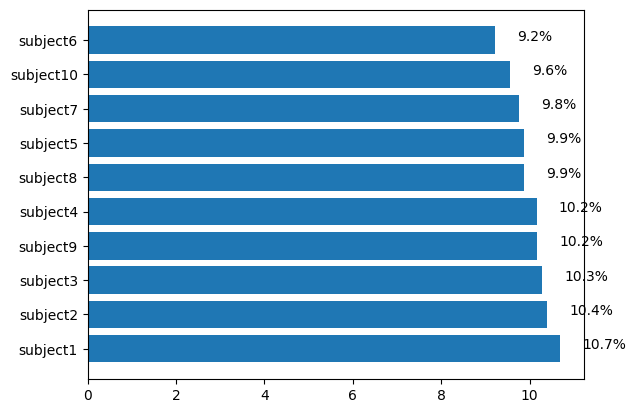

In [11]:
plot_category(data,'subject')
plt.show()

# All subjects contributes almost equally.

In [12]:
label_map = {
    0: 'Nothing',
    1: 'Standing still (1 min)',  
    2: 'Sitting and relaxing (1 min)', 
    3: 'Lying down (1 min)',  
    4: 'Walking (1 min)',  
    5: 'Climbing stairs (1 min)',  
    6: 'Waist bends forward (20x)',
    7: 'Frontal elevation of arms (20x)', 
    8: 'Knees bending (crouching) (20x)', 
    9: 'Cycling (1 min)', 
    10: 'Jogging (1 min)', 
    11: 'Running (1 min)', 
    12: 'Jump front & back (20x)' 
}

In [13]:
# Create plots for one particular subject performing the activities - using subject 1 since it has the most data
# Each plot section divided by activity and type of reading taken

#Defining functions to visualize comparisons.
def plot_comparison(data, metric = 'acceleration'):
 
  metric = metric[0].lower()
  data = data
 
  for i in range(0,13):
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()  
 
    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend() 
 
    plt.show()
    print()
          

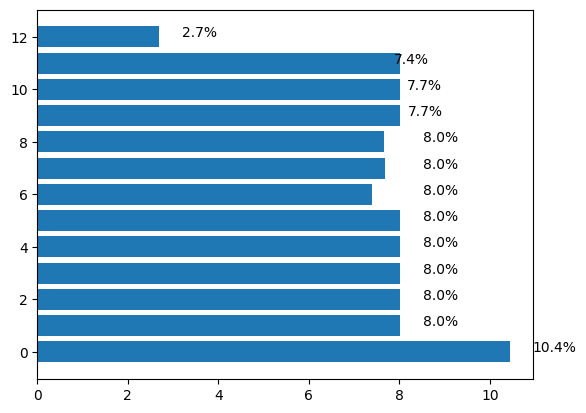

In [14]:
plot_category(data,'Activity')
plt.show()   ## Activity 12 has very less data points compare to rest of all.



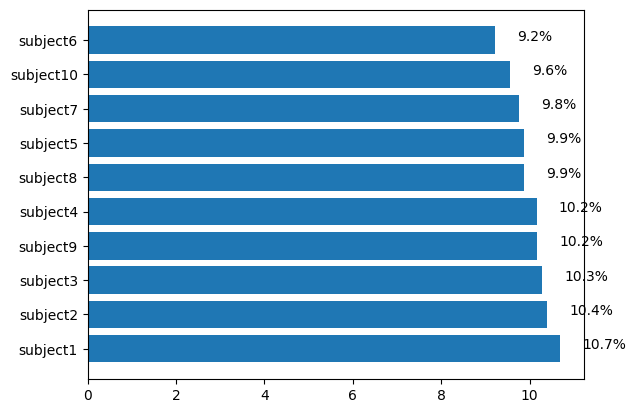

In [15]:
plot_category(data,'subject') # All subjects contributes almost equally.

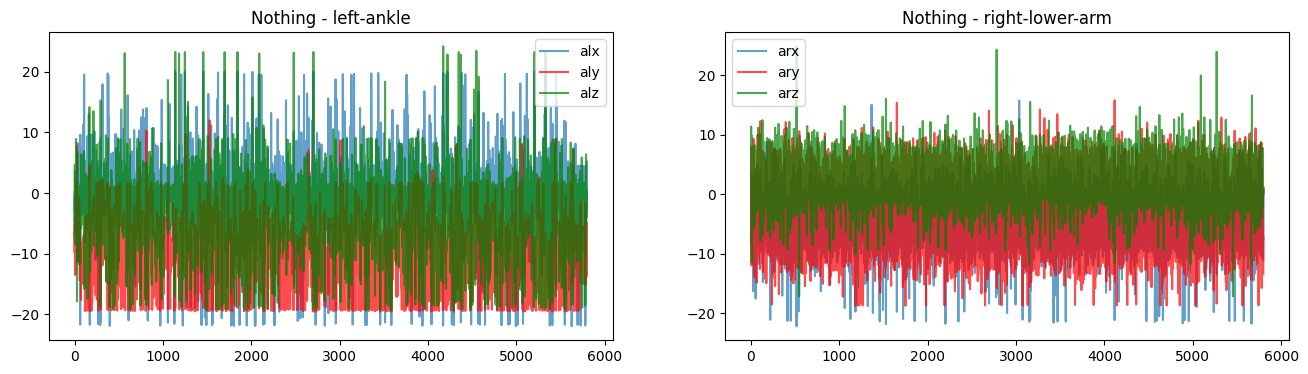

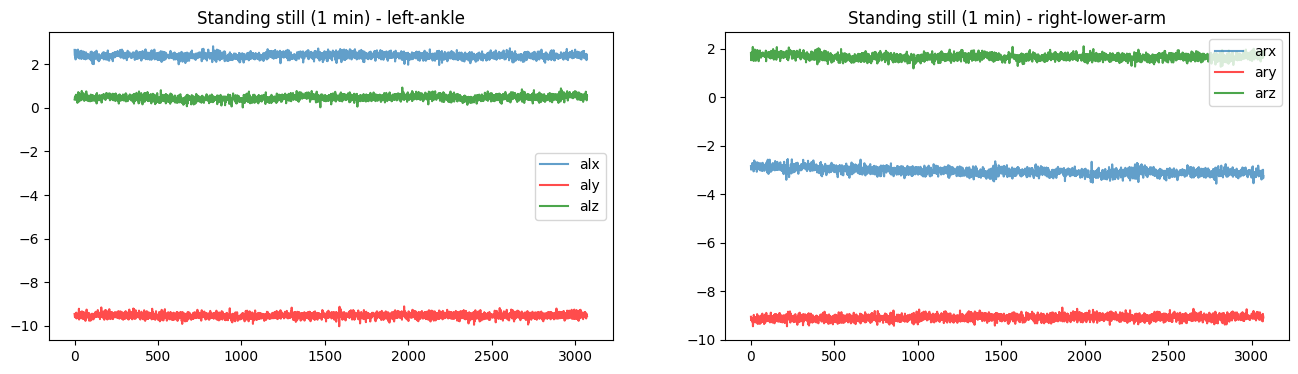

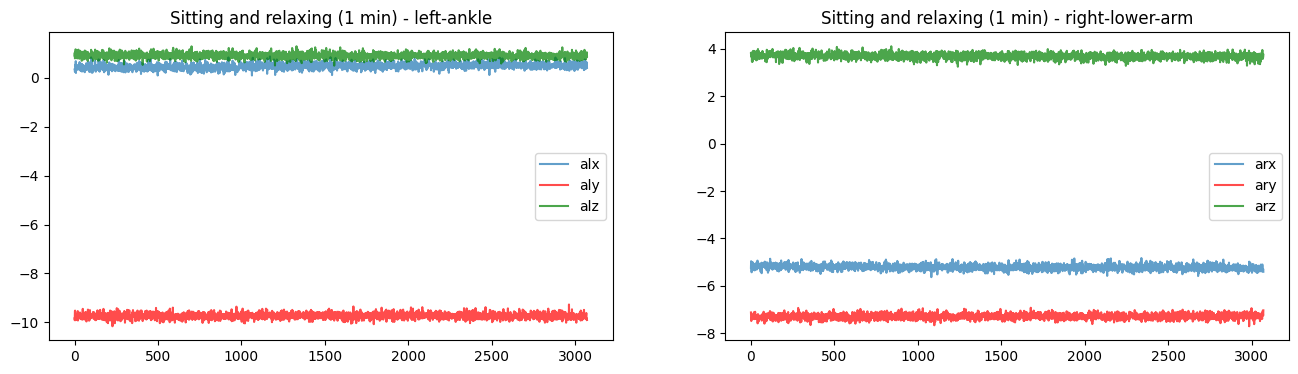

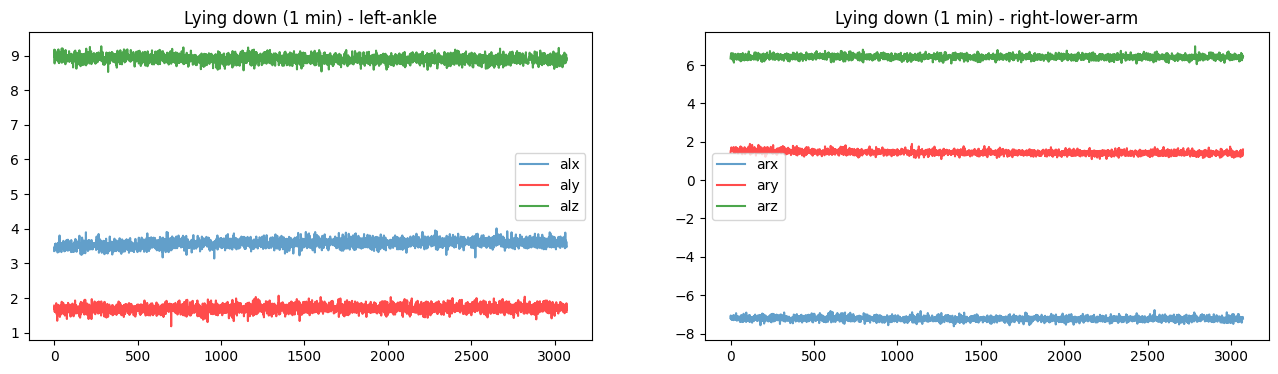

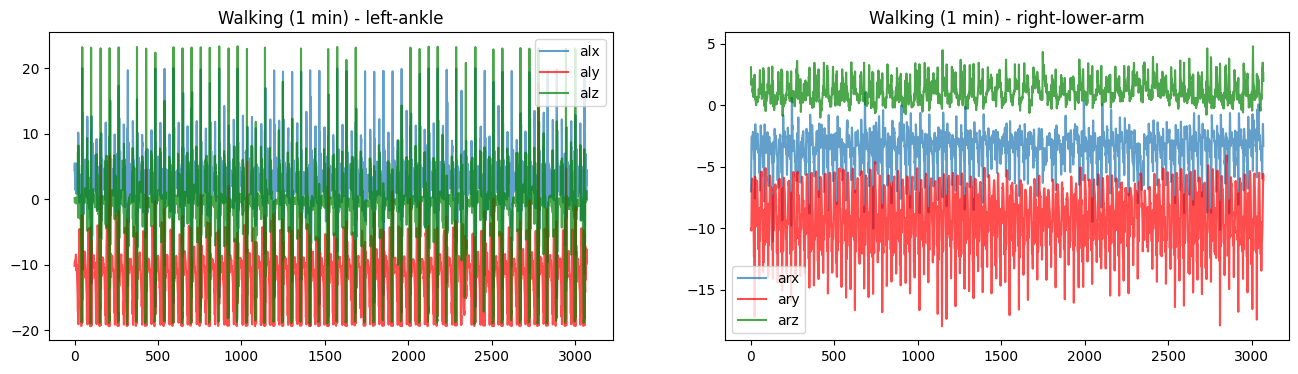

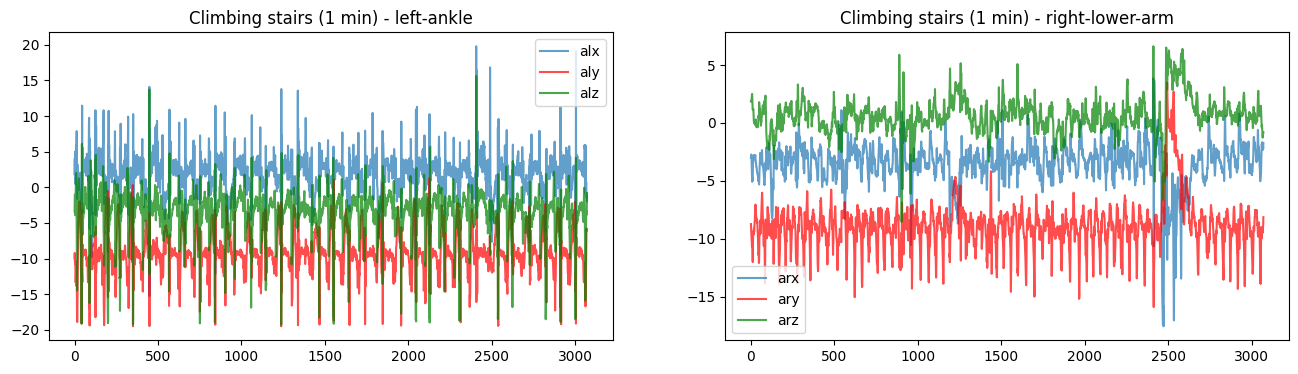

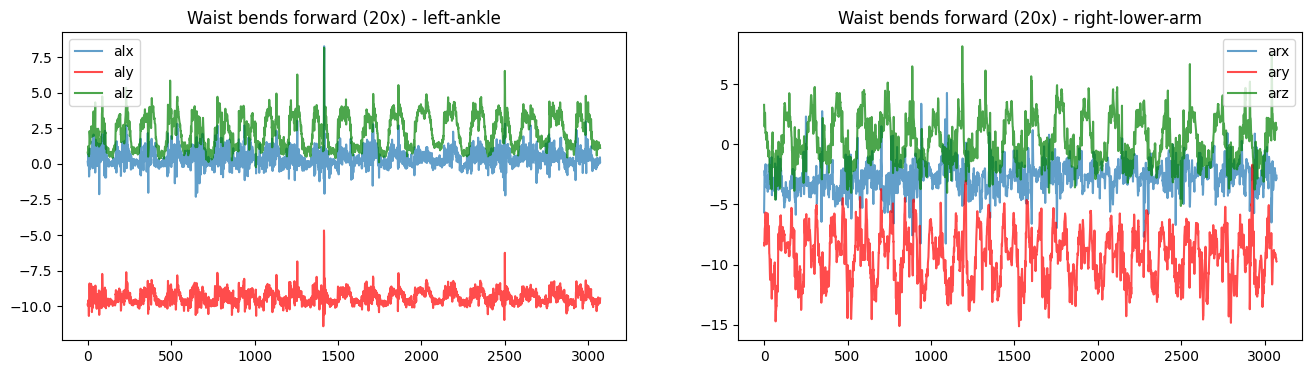

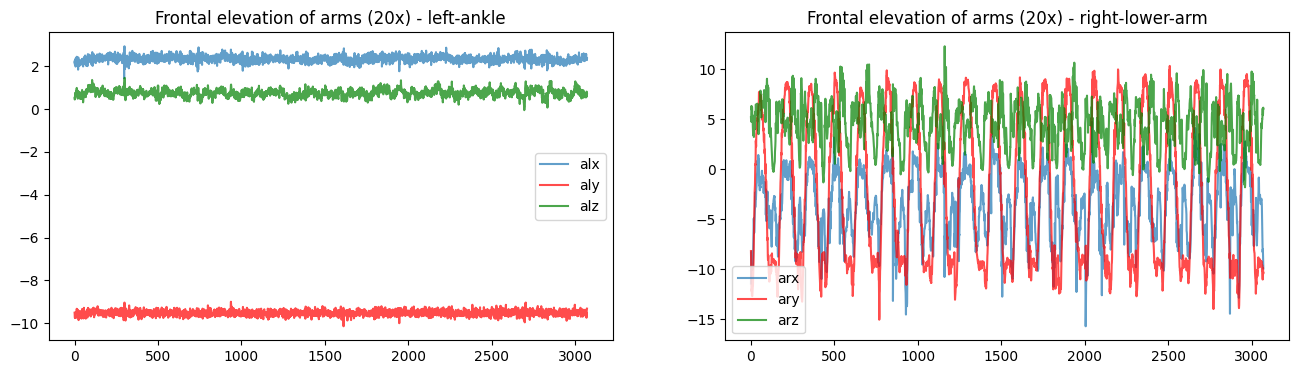

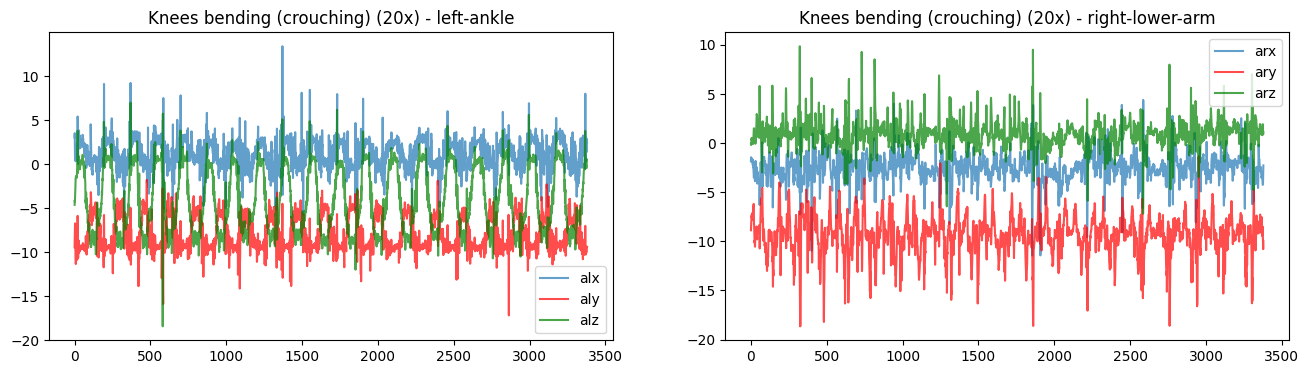

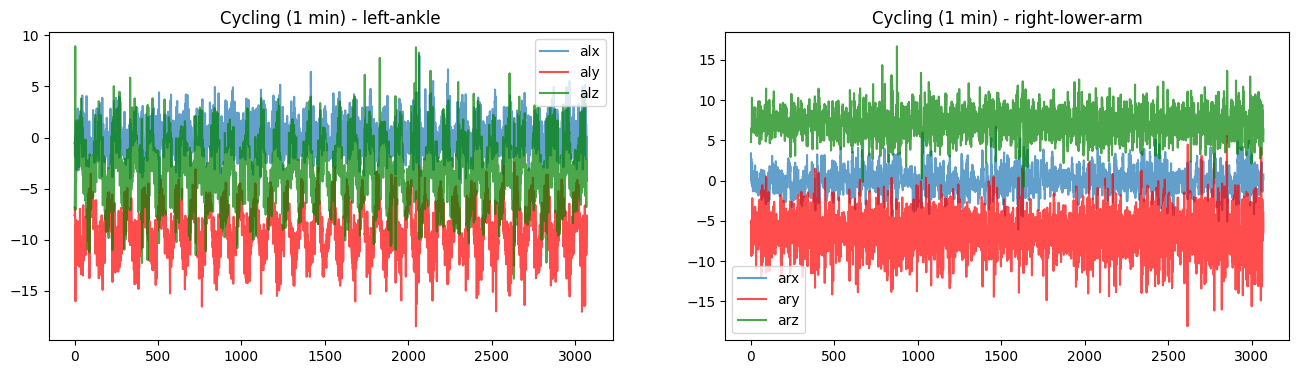

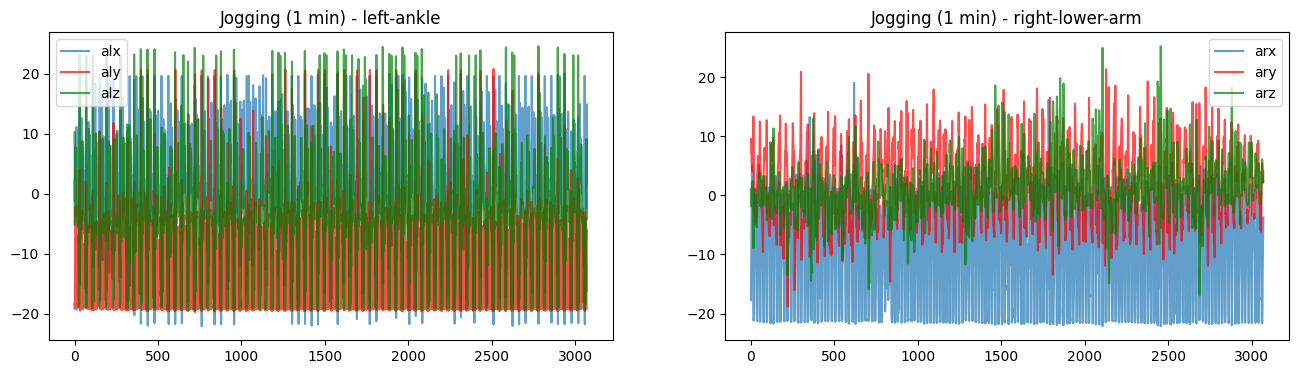

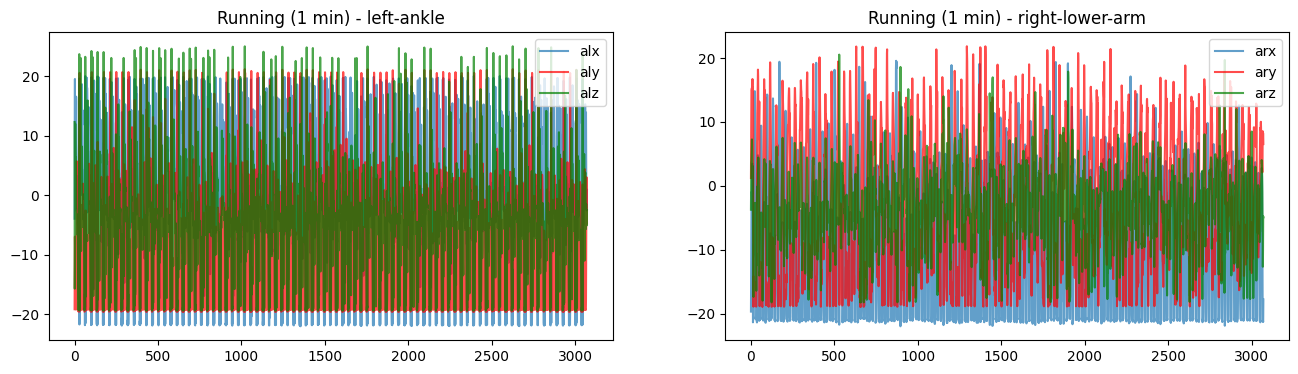

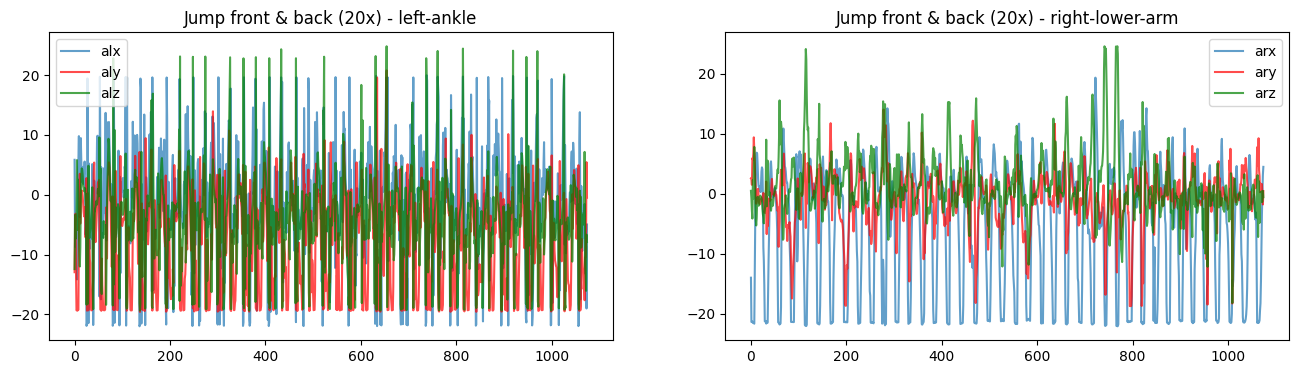

In [16]:
subject1 = data[data['subject']=='subject1']
plot_comparison(subject1,'acceleration')

## Clearly visible that static activites like sitting and lying down can be seperated from dynamic like cyclic and jumping.

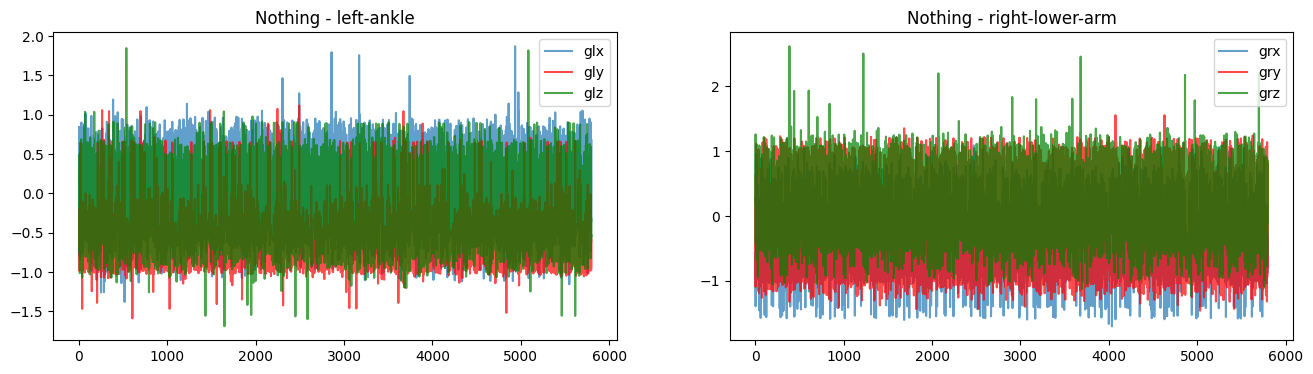

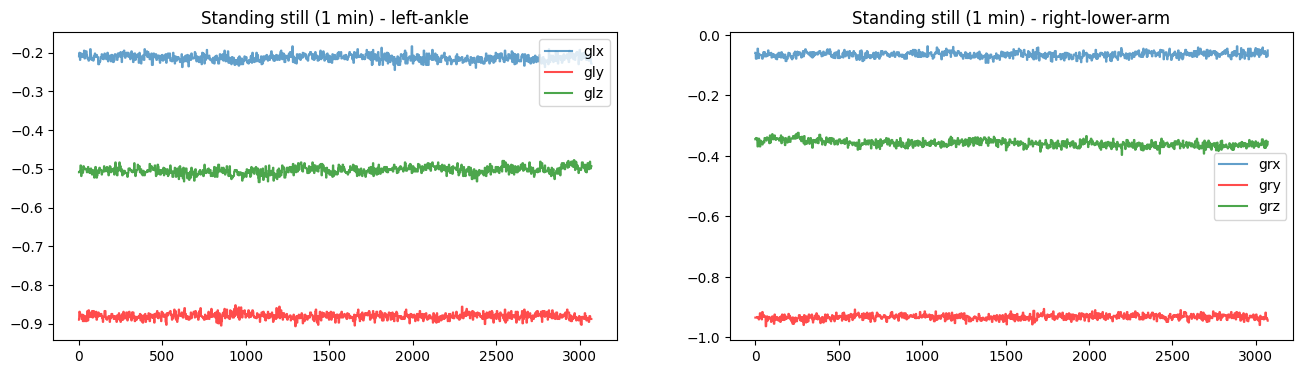

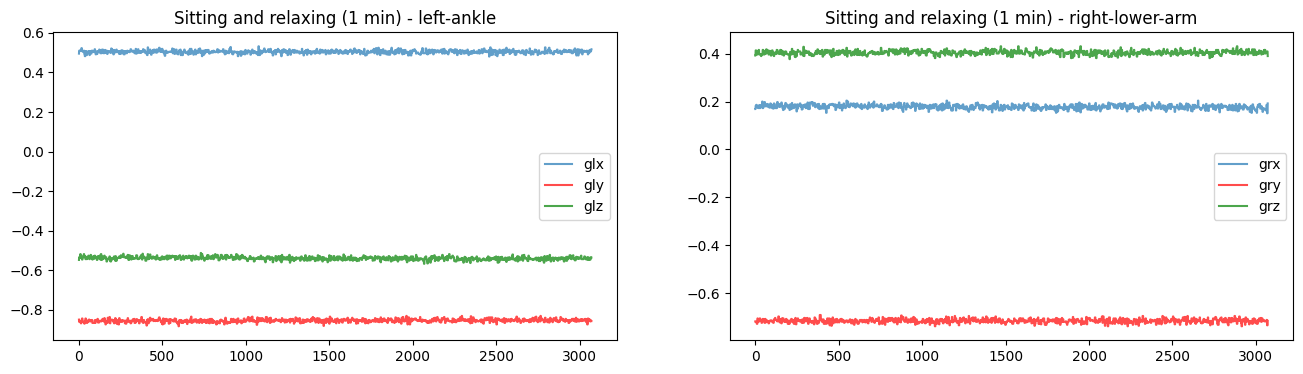

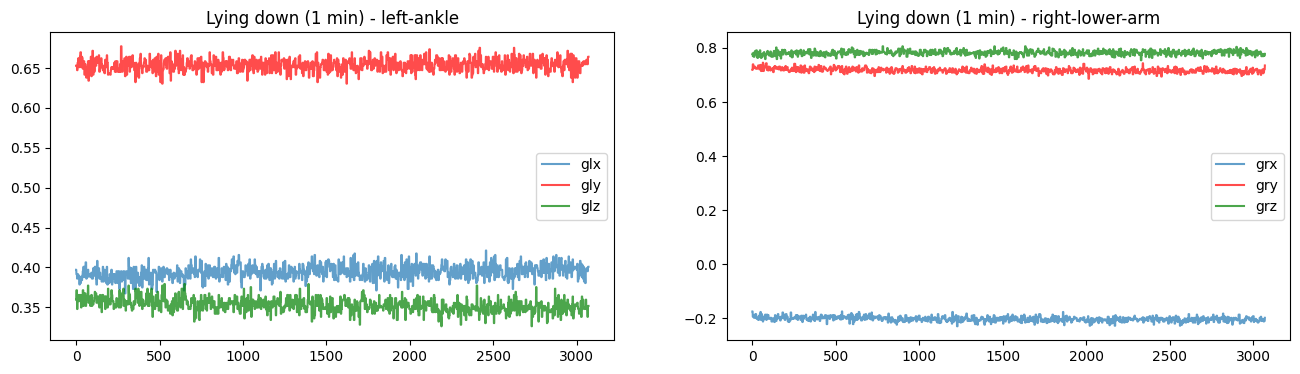

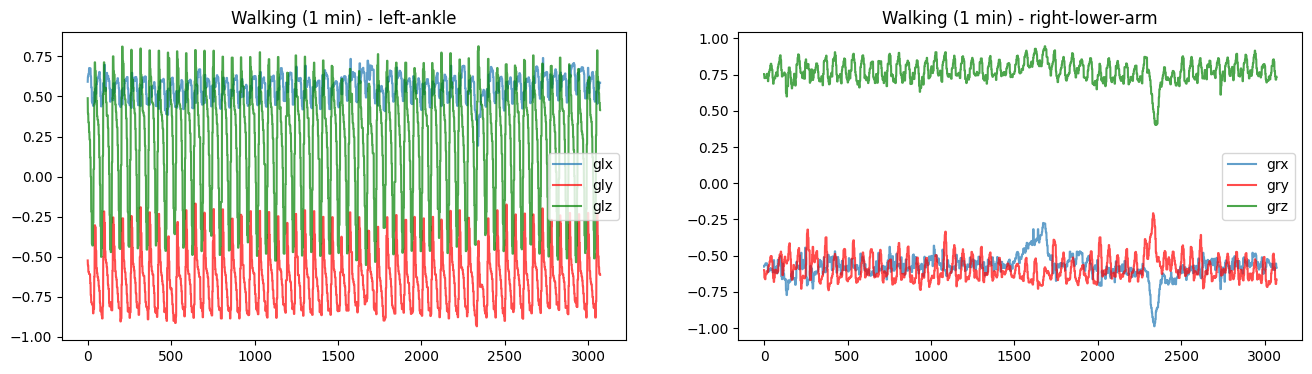

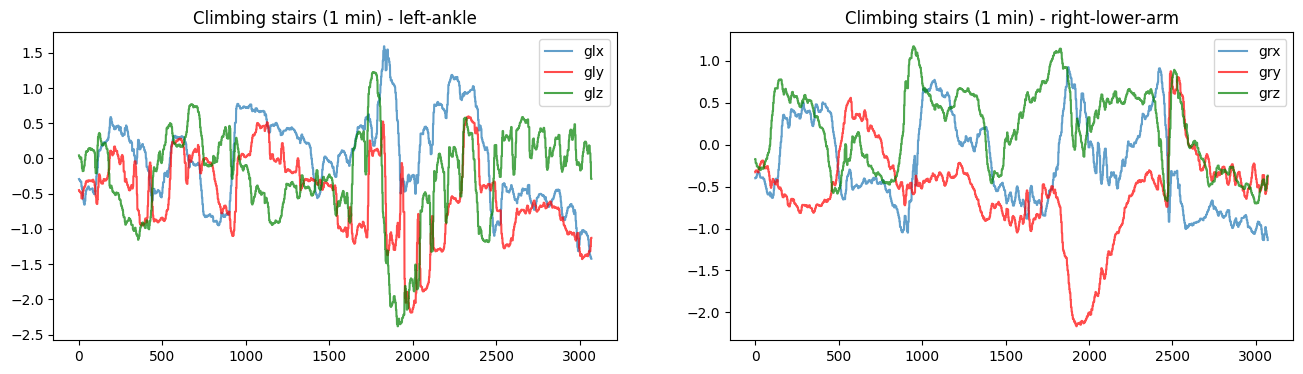

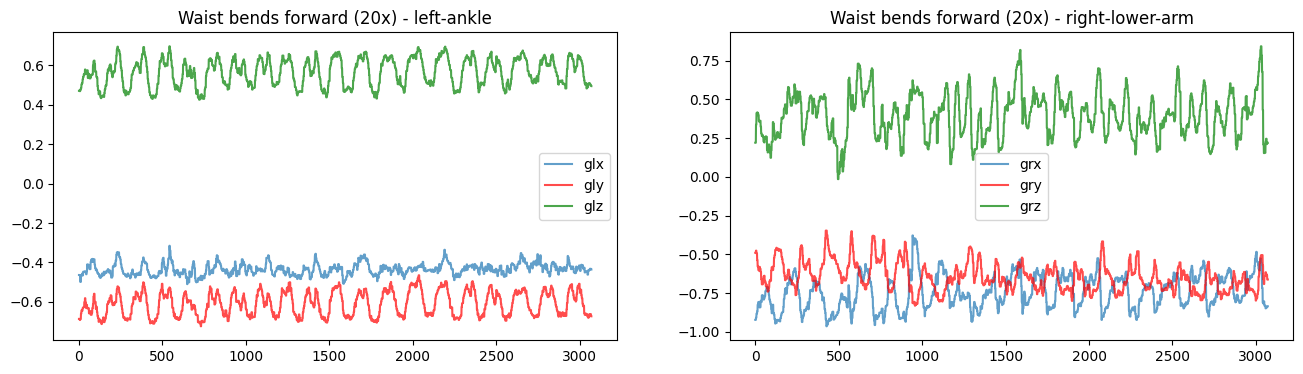

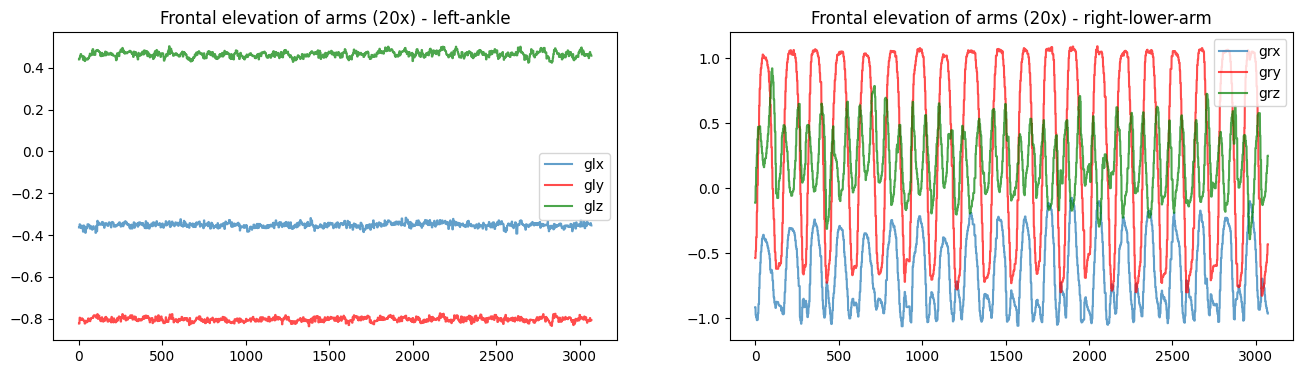

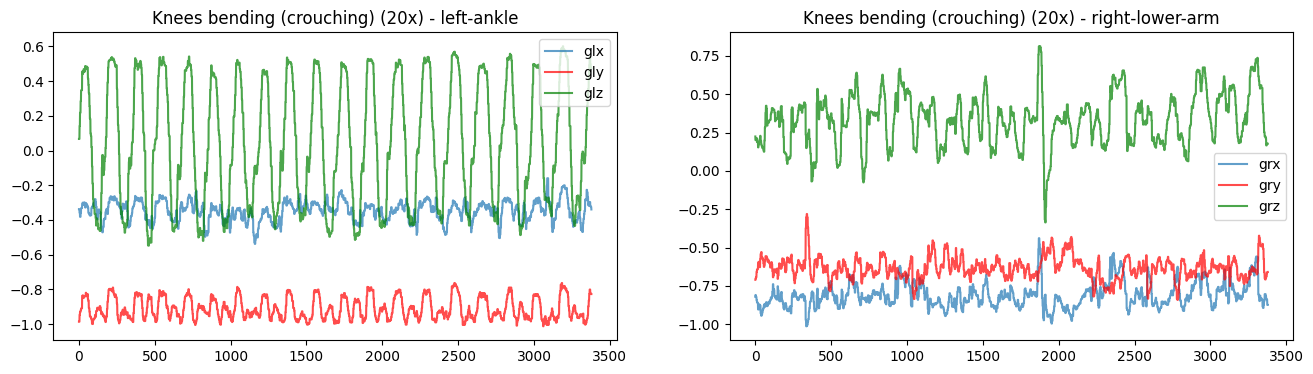

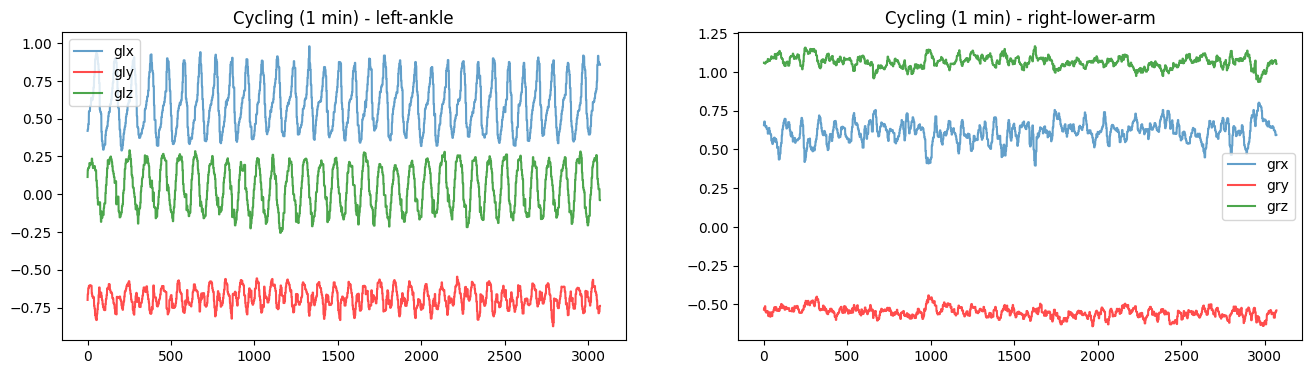

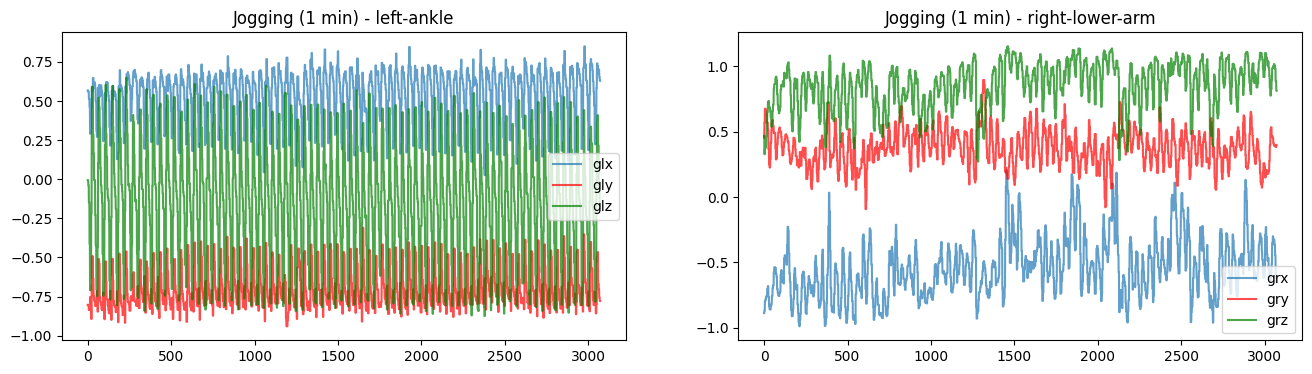

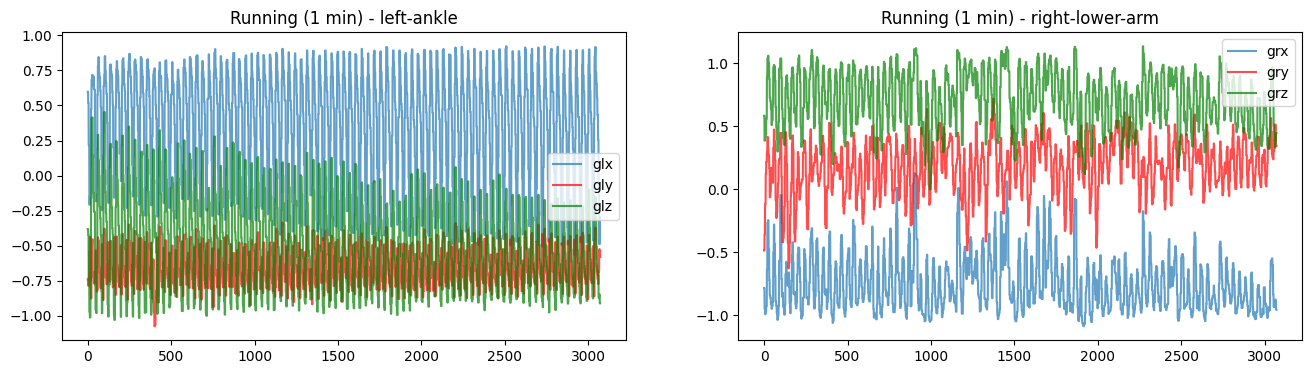

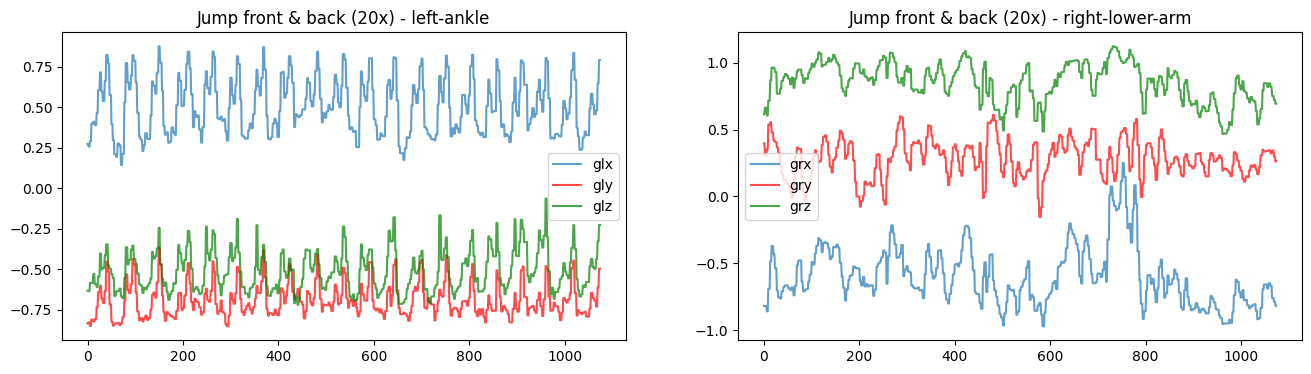

In [17]:
plot_comparison(subject1,'gyroscope')

## Gyroscope data is much more clear,stable and follows a particular frequency cycle.

### Data Cleaning

In [18]:
data['Activity'] = data['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None','Standing still (1 min)', 'Sitting and relaxing (1 min)', 'Lying down (1 min)', 'Walking (1 min)','Climbing stairs (1 min)','Waist bends forward (20x)','Frontal elevation of arms (20x)','Knees bending (crouching) (20x)','Cycling (1 min)','Jogging (1 min)','Running (1 min)','Jump front & back (20x)'])
data['Activity']

154060                        None
936066                        None
167106                        None
493889                        None
355024                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [19]:
data.Activity.value_counts()

None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: Activity, dtype: int64

<AxesSubplot: ylabel='Activity'>

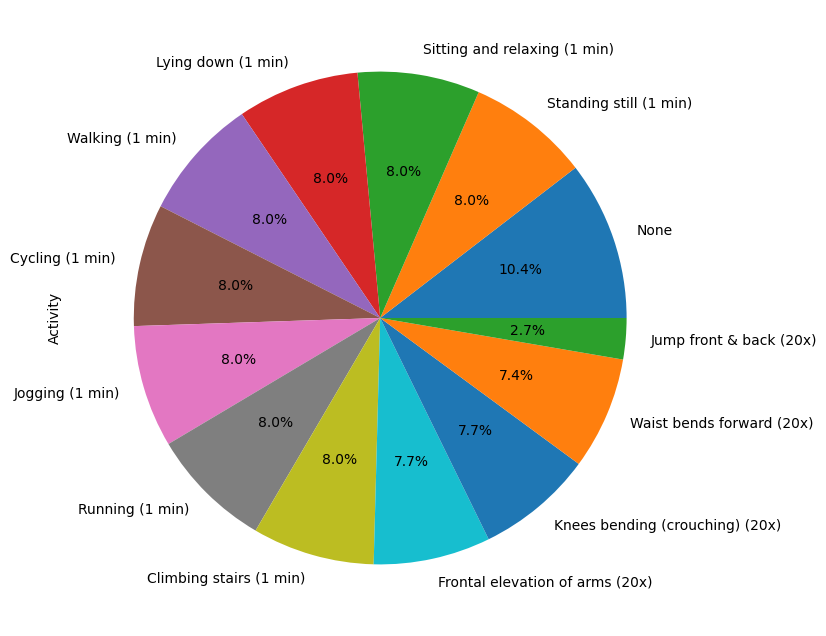

In [20]:
plt.figure(figsize=(12,8))
round(data["Activity"].value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [21]:
df1 = data.copy()

#Dropping feature have data outside 98% confidence interval
for feature in df1.columns[:-2]:
  lower_range = np.quantile(data[feature],0.01)
  upper_range = np.quantile(data[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.46512 to 19.216
shape (375532, 14)
aly range: -19.378 to 2.3784859999999926
shape (369637, 14)
alz range: -18.949 to 14.129059999999997
shape (365835, 14)
glx range: -0.7551 to 0.80891
shape (358838, 14)
gly range: -1.0694 to 0.96623
shape (352162, 14)
glz range: -1.1061 to 0.8290799999999999
shape (346515, 14)
arx range: -21.487 to 9.017605999999999
shape (341292, 14)
ary range: -18.691 to 11.832
shape (335066, 14)
arz range: -10.24712 to 11.809119999999995
shape (332385, 14)
grx range: -1.0216 to 0.9549
shape (328760, 14)
gry range: -1.1458 to 0.91376
shape (323865, 14)
grz range: -0.7069 to 1.125
shape (319254, 14)


In [22]:
# transforming the datatype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['subject'] = le.fit_transform(data['subject'])

data['Activity'] = le.fit_transform(data['Activity'])

In [23]:
data.dtypes

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int32
subject       int32
dtype: object

### Modeling Data Preparation 

In [24]:
#spliting data into train and test set
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((253203, 14), (66051, 14))

In [25]:
# droping activity and subject label

X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((253203, 12), (253203,), (66051, 12), (66051,))

In [26]:
# Normalizing the data

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

x_train_cols = X_train.columns.tolist()
# scaler = StandardScaler()
# scaler = scaler.fit(X_train)
# scaled_train_data = scaler.transform(X_train)
# scaled_train_data = pd.DataFrame(scaled_train_data, columns = x_train_cols)
# scaled_test_data = pd.DataFrame(scaler.transform(X_test), columns = x_train_cols)

ro_scaler = RobustScaler().fit(X_train)
scaled_train_data = ro_scaler.transform(X_train)
scaled_test_data = ro_scaler.transform(X_test)

In [27]:
pd.DataFrame(scaled_train_data, columns = x_train_cols).describe().T

count      mean       std       min       25%  50%       75%       max
alx  253203.0  0.114494  1.102702 -5.176307 -0.473266  0.0  0.526734  7.183387
aly  253203.0  0.323104  2.466859 -5.751300 -0.184395  0.0  0.815605  7.028054
alz  253203.0 -0.185774  1.186079 -4.470006 -0.683815  0.0  0.316185  3.196521
glx  253203.0 -0.034264  0.533020 -0.963987 -0.563560  0.0  0.436440  0.822044
gly  253203.0  0.423306  1.423588 -1.380906 -0.428551  0.0  0.571449  6.000181
glz  253203.0 -0.014142  0.599382 -1.144123 -0.505544  0.0  0.494456  1.039905
arx  253203.0 -0.197641  1.148909 -4.895769 -0.566643  0.0  0.433357  2.900340
ary  253203.0  0.300580  0.951343 -1.794269 -0.270952  0.0  0.729048  3.277640
arz  253203.0  0.139046  0.746496 -2.826612 -0.343951  0.0  0.656049  2.239144
grx  253203.0  0.082174  0.621616 -0.892816 -0.435893  0.0  0.564107  1.456887
gry  253203.0  0.284588  0.816020 -0.768998 -0.325951  0.0  0.674049  2.405073
grz  253203.0 -0.069890  0.576692 -1.278049 -0.553654  0.0  0.446346  0.795127

### Modeling

In [28]:
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    
    
    plt.figure(figsize=(13, 12))
    
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=label_map.values(),
                yticklabels=label_map.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [30]:
lr = LogisticRegression()
lr.fit(scaled_train_data , y_train)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr.score(scaled_train_data , y_train)

0.6045504990067259

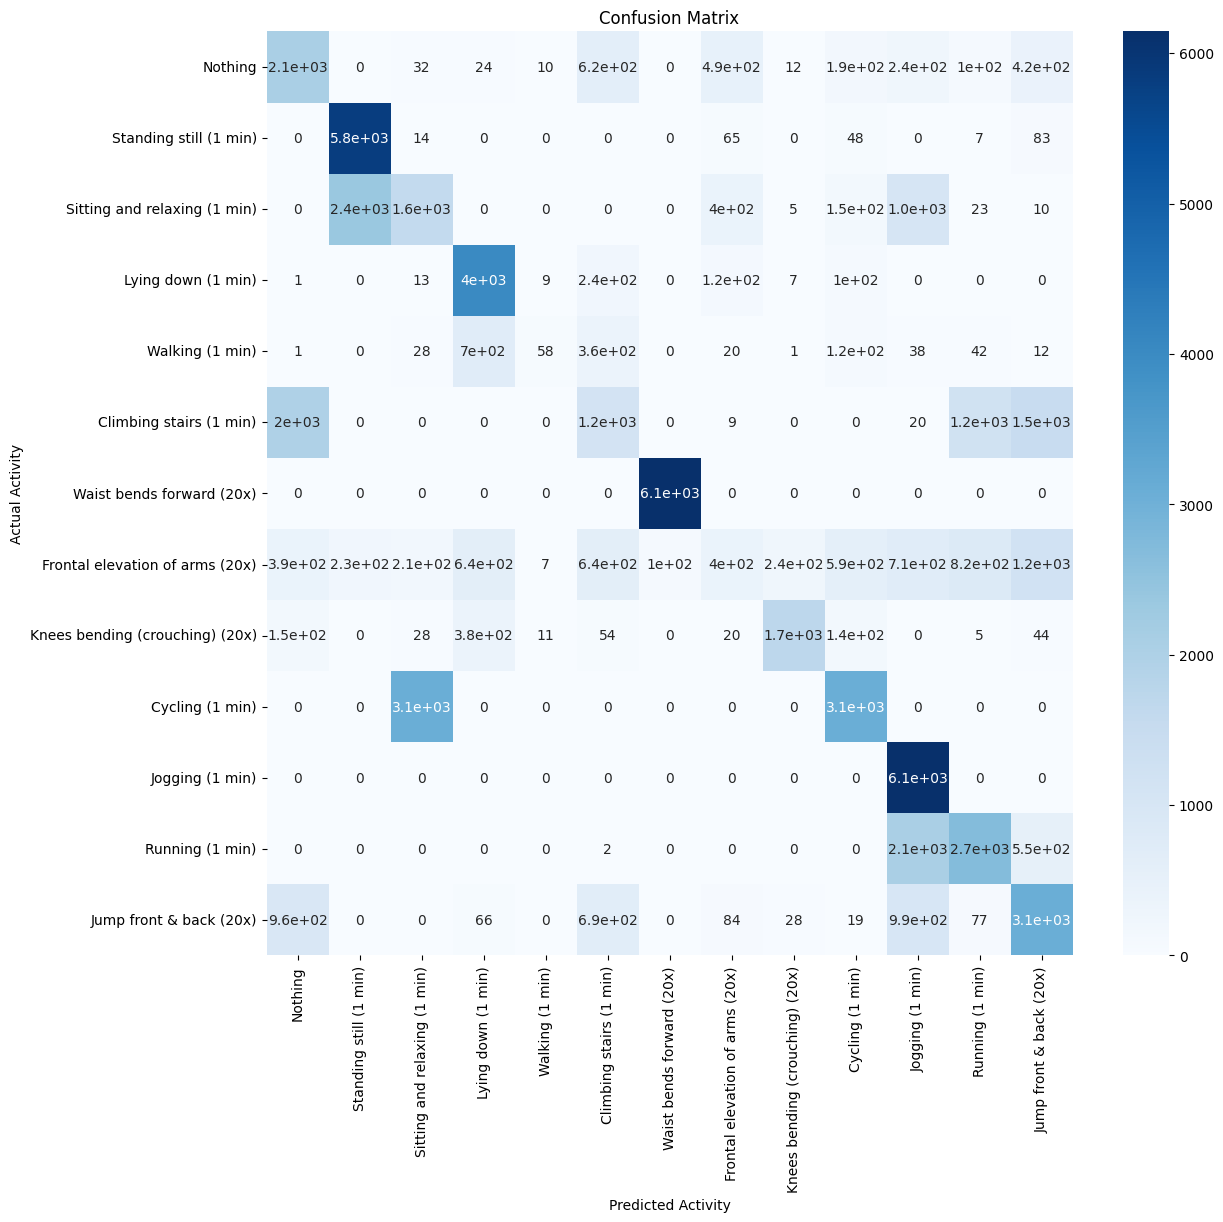

Accuracy Score: 57.5177%
Precision Score: 56.2092%
Recall Score: 54.8662%
F_1 Score: 52.0487%
Sensitvity: 54.8662%


In [32]:
y_pred_lr = lr.predict(scaled_test_data)
resultsSummarizer(y_test, y_pred_lr)

In [33]:
# KNN'

k1=KNeighborsClassifier(n_neighbors=5)
k1.fit(scaled_train_data,y_train)
k1.score(scaled_train_data,y_train)

0.9557193240206474

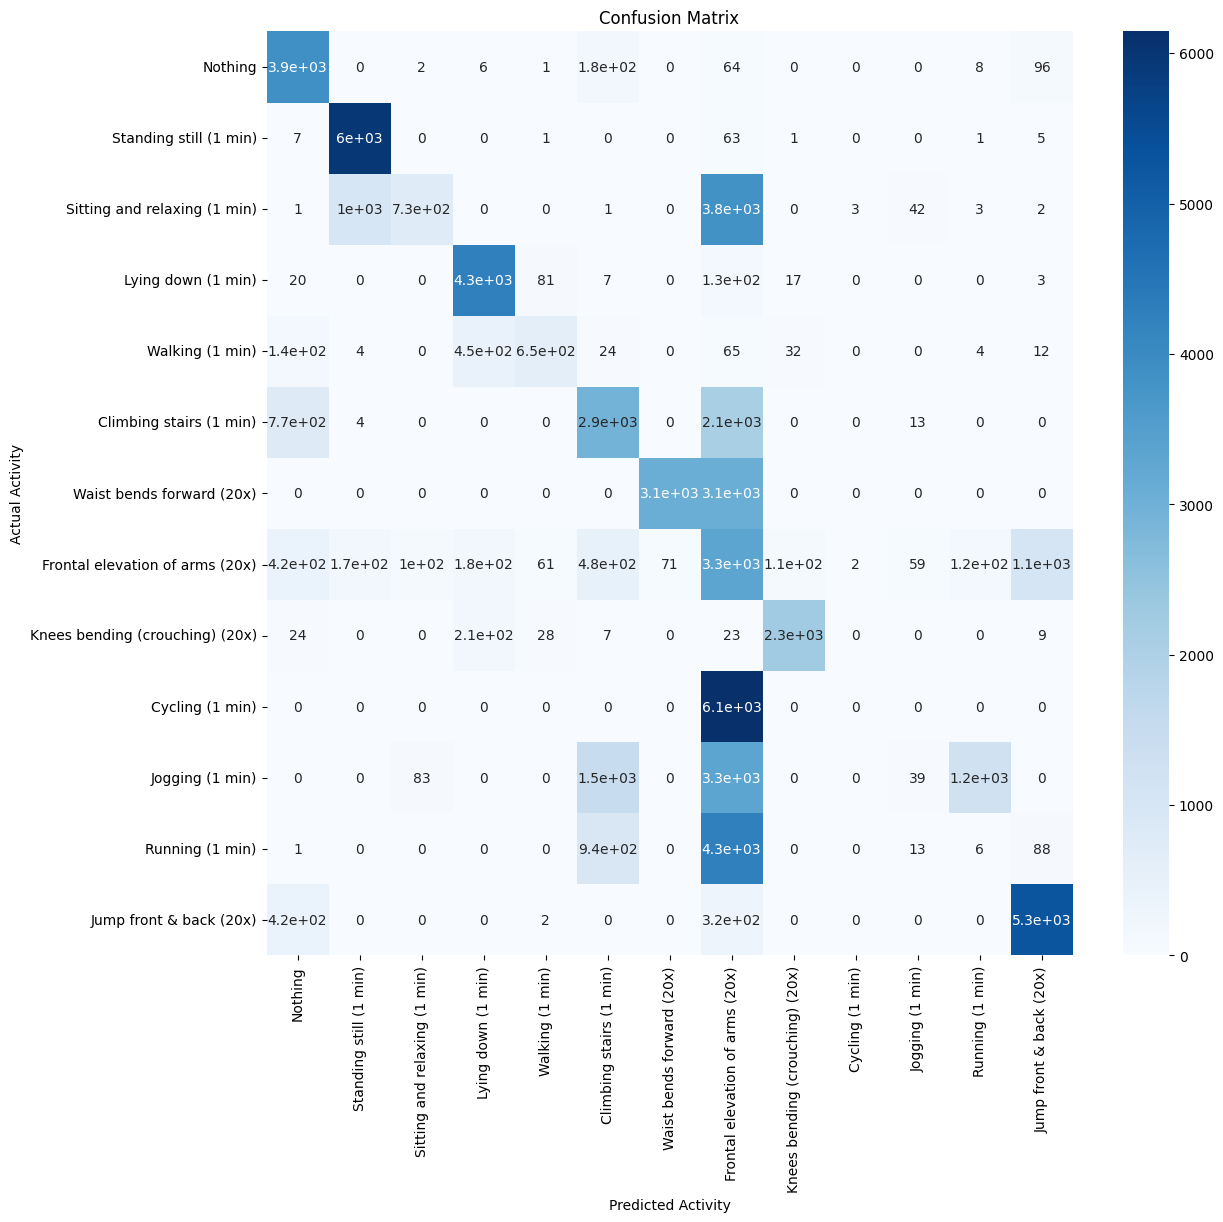

Accuracy Score: 48.9864%
Precision Score: 57.6832%
Recall Score: 51.9472%
F_1 Score: 50.0077%
Sensitvity: 51.9472%


In [34]:
y_pred_k1 = k1.predict(scaled_test_data)
resultsSummarizer(y_test, y_pred_k1)

In [35]:
# Decision Tree
dt=DecisionTreeClassifier(max_depth=14)
dt.fit(scaled_train_data, y_train)
dt.score(scaled_train_data,y_train)

0.9097680517213461

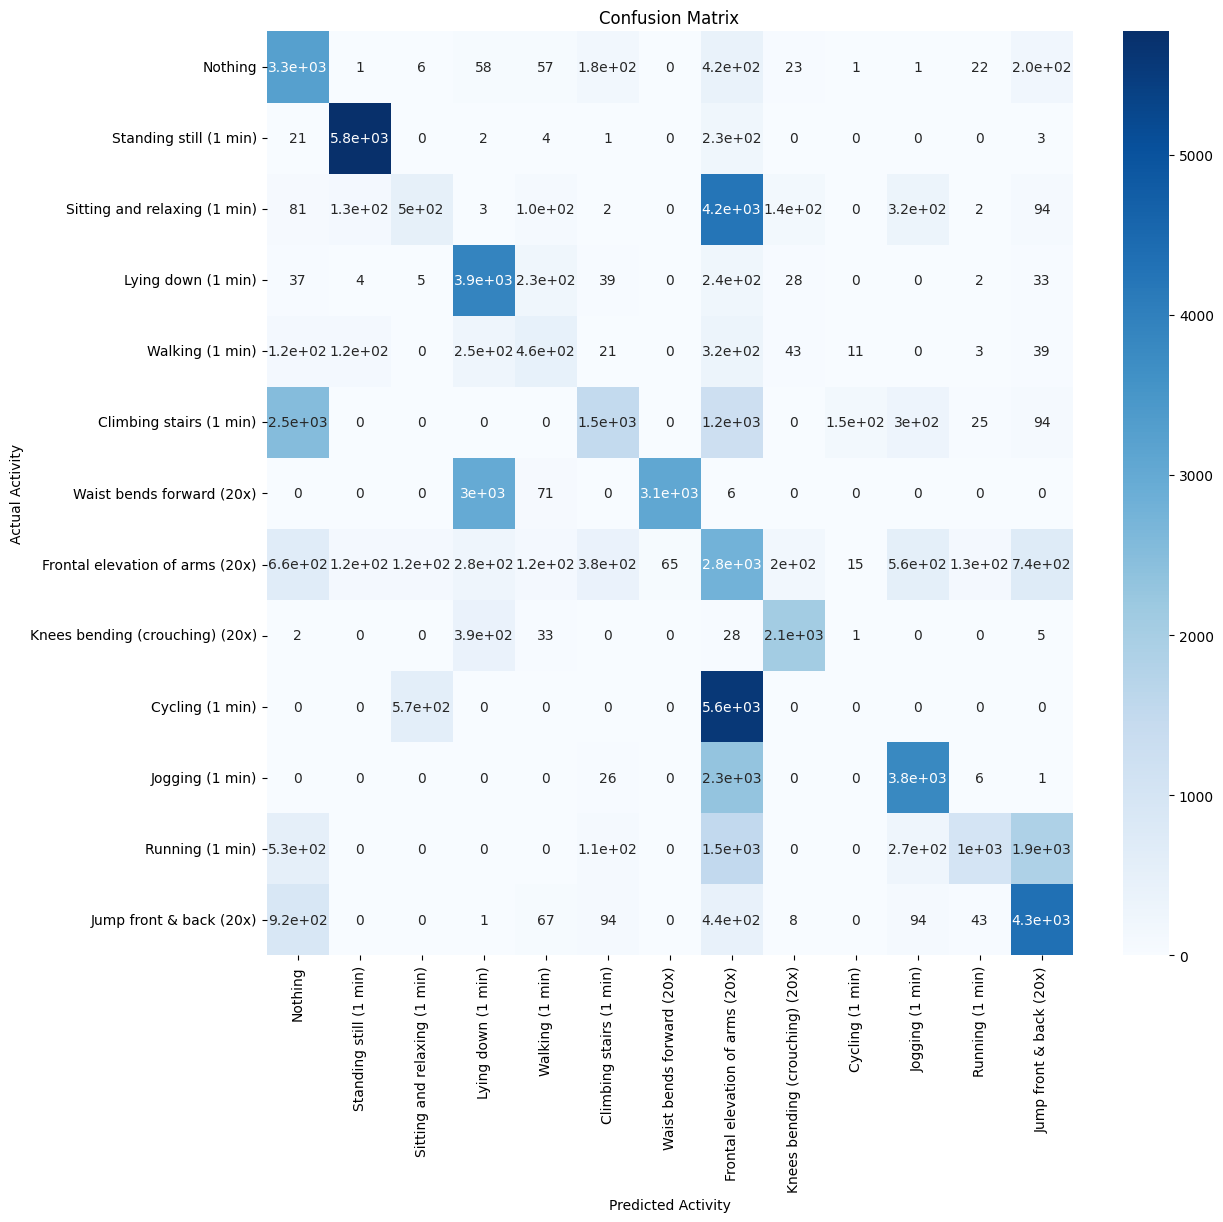

Accuracy Score: 49.1696%
Precision Score: 56.5058%
Recall Score: 50.5635%
F_1 Score: 48.4774%
Sensitvity: 50.5635%


In [36]:
y_pred_tree = dt.predict(scaled_test_data)
resultsSummarizer(y_test, y_pred_tree)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(scaled_train_data, y_train)
rfst.score(scaled_train_data,y_train)

In [ ]:
y_pred_rfst = rfst.predict(scaled_test_data)
resultsSummarizer(y_pred_rfst, y_test)

### Modeling for CNN:

In [30]:
from scipy import stats

#function to create time series datset for sequence modeling
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values   ## 0-100, 50-150, etc
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [31]:
X_train,y_train = create_dataset(scaled_train_data, y_train, 100, step=50)
X_train.shape, y_train.shape

C:\Users\admin\AppData\Local\Temp\ipykernel_6596\3465284889.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


((863, 100, 21), (1726, 1))

In [32]:
X_test,y_test = create_dataset(scaled_test_data, y_test, 100, step=50)
X_test.shape, y_test.shape

C:\Users\admin\AppData\Local\Temp\ipykernel_6596\3465284889.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


((70, 100, 21), (140, 1))

In [35]:
# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train)
print(y_train_seq.shape)
print(y_train_seq)

y_test_seq = to_categorical(y_test)
print(y_test_seq.shape)
print(y_test_seq)

NameError: name 'to_categorical' is not defined